# TIM - TP1 : Introduction au traitement d'images

---
**AVANT DE COMMENCER, TRES IMPORTANT !!**

Durant ce semestre, vous aurez des TPs à rendre.

Vous aurez donc dans ces fichiers de TPs des cellules de codes à compléter, comme celle-ci :

In [1]:
# A COMPLETER
...

Ou des cellules texte à compléter (généralement commençant par **_REPONSE_**) :

**_REPONSE :_** _Ici, vous écrivez votre réponse._

Vérifiez bien avant de rendre un TP que toutes les cellules (codes et texte) soient bien **complétées**.


--- 

Le but du TP est de prendre ses marques sur Python avec les différentes librairies utiles pour le traitement d'images.
Dans le cadre des travaux pratiques de ce cours, nous allons principalement utiliser 3 librairies Python : 
- NumPy, pour le calcul mathématique et la manipulation de matrices ;
- Matplotlib pour la visualisation graphique des données ;
- OpenCV (cv2) pour la manipulation et le traitement d'images.

Pour plus de détails sur Python, NumPy, Matplotlib et OpenCV, un grand nombre de ressources sont disponibles sur https://pythonprogramming.net/, y compris plusieurs séries de vidéos YouTube.

La documentation complète de Python 3 et des librairies qui seront utilisées sont disponibles ici :
- Python 3 : https://docs.python.org/fr/3/
- NumPy : https://docs.scipy.org/doc/numpy-1.15.0/reference/index.html
- Matplotlib : https://matplotlib.org/3.1.1/index.html
- OpenCV : https://docs.opencv.org/4.1.1/index.html (bon courage !)

In [1]:
%matplotlib inline

# Librairies Matplotlib, NumPy et OpenCV
import matplotlib.pyplot as plt
import numpy as np
import cv2 #OpenCV

# Librairies supplémentaires pour certaines parties du TP
from sklearn.cluster import MiniBatchKMeans


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

Et définissez le chemin d'accès à la base d'images (utilisée ultérieurement)

In [3]:
# A changer si le dossier ne se situe pas à cet endroit
path_images = 'images/'

---

## PARTIE 1 : NUMPY

L'objectif de cette partie est de revoir quelques fonctions utiles de Numpy, de reprendre la main après les vacances, mais également de mettre en lumière quelques aspects importants pour le semestre avec les opérations sur les images.

---
### Ex. 1 : La base des matrices sur Numpy

D'un point de vue numérique, une image est tout simplement une matrice. Le traitement d'image s'apparente donc à l'application d'algorithmes sur des matrices. 

Créez la matrice
$A = \left[\begin{array}{lll}
1 & 2 & 3\\
4 & 5 & 6\\
−1 & 0 & 1\\
1 & 1 & 2
\end{array}\right]$

In [4]:
import numpy as np

A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [-1, 0, 1],
    [1, 1, 2]
])
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [-1,  0,  1],
       [ 1,  1,  2]])

Affichez la taille et les dimensions de la matrice A créée.

In [5]:
A.size

12

In [6]:
A.shape

(4, 3)

Affichez le nombre de dimensions de A.

In [7]:
A.ndim

2

Affichez la deuxième colonne de A.

In [8]:
A[:,1]

array([2, 5, 0, 1])

Créez un sous-tableau s composé des 2ème et 3ème lignes
de A.

In [9]:
s = A[1:3, :]
s

array([[ 4,  5,  6],
       [-1,  0,  1]])

---
## Ex. 2 : La multiplication de matrices

La multiplication de matrices sur Python peut se faire avec NumPy. Tout d'abord, créez 2 matrices A et B, de taille NxN.

In [10]:
N = 2
A = np.random.randint(0,10,(N,N))
B = np.random.randint(0,10,(N,N))
print('A : \n{}'.format(A))
print('B : \n{}'.format(B))

A : 
[[0 3]
 [5 7]]
B : 
[[8 0]
 [1 1]]


Que fait la fonction *multiply* de NumPy (équivalent à *A*B*) ?

In [11]:
np.multiply(A,B)

array([[0, 0],
       [5, 7]], dtype=int32)

Que fait la fonction *dot* de NumPy (équivalent à A@B) ?

In [12]:
np.dot(A,B)

array([[ 3,  3],
       [47,  7]], dtype=int32)

**_REPONSE :_** La fonction multiply de NumPy fait une multiplication élément par élément. La fonction dot de NumPy fait elle une multiplication matricielle.

Calculez la transposée de A multipliée par B (avec numpy.dot)

In [13]:
np.dot(A.T,B)

array([[ 5,  5],
       [31,  7]], dtype=int32)

---
## Ex. 3 : Maîtrise tes types de données !!!


Ce petit exercice ne vous paraîtra pas être grand chose, mais croyez-moi, c'est un point méga important. Cela peut-être cause de nombreux bugs en traitement d'images, lorsqu'on applique des algorithmes. Donc, prenez des notes sur ce point-là, c'est mon petit conseil 

Affichez le type des élements de la matrice A.

In [14]:
A.dtype

dtype('int32')

Il est important dans le cadre de la manipulation de matrices de bien connaître le type des éléments que nous manipulons :
- Est-ce un naturel (uint), un entier (int), un réel (float), un booléen (bool), un complexe (complex) ?
- En combien de bits l'élement est codé ? (8, 16, 32, 64)

Vous trouverez ci-dessous les types de données disponibles sous NumPy.

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

Un exemple concret de mauvaise manipulation de matrice :

In [15]:
B = np.full((2,2), 255, dtype = np.uint16)
C = np.full((2,2), 255, dtype = np.uint8)
print("B :\n{}\n".format(B))
print("C :\n{}\n".format(C))

B :
[[255 255]
 [255 255]]

C :
[[255 255]
 [255 255]]



In [16]:
print("B+1 :\n{}\n".format(B+1))

B+1 :
[[256 256]
 [256 256]]



In [17]:
print("C+1 :\n{}\n ".format(C+1))

C+1 :
[[0 0]
 [0 0]]
 


Pour quelle(s) raison(s) avons-nous obtenu ces résultats précédents ?

**_REPONSE :_**

---
## Ex. 4 : Le masque, le boss final des manipulations de matrices

Ce petit exercice est également important car on va énormément utiliser les masques dans cette matière. Cela va être difficle au début de les maîtriser parfaitement, mais si vous y arrivez, vous allez gagner beaucoup de temps (que ce soit dans l'écriture des codes comme dans les temps d'exécution). Cela permet d'éviter de faire des boucles, et des boucles de boucles, voire également des boucles de boucles de boucles de boucles (déjà fait, pas terrible).


Créeons une matrice A de taille 5X5 comprenant des valeurs aléatoires entières entre 0 et 9.

In [18]:
A = np.random.randint(0,10,(5,5))
print('A : \n{}'.format(A))

A : 
[[7 9 9 9 2]
 [5 4 6 6 1]
 [7 7 7 5 5]
 [9 4 8 8 4]
 [9 3 2 1 2]]


Nous allons maintenant créer un masque. Avant que vous me posiez la question, un masque est une matrice de booléen (0 ou 1), tout simplement. Créez un masque M de la même taille que A.

In [19]:
M = np.random.randint(0,2,(5,5))
print('M : \n{}'.format(M))


M : 
[[0 0 0 0 1]
 [1 0 0 1 0]
 [0 0 0 1 1]
 [1 1 1 1 0]
 [0 0 1 0 1]]


Comme précisé précédemment, nous voulons un tableau de booléen. En rappel à l'exercice 3 de la partie 1, vérifiez que le type de la matrice est adéquat. Si ce n'est pas le cas, utilisez la fonction astype pour avoir une matrice de booléen. Pour être sur que votre matrice est du bon type, vous devriez voir en l'affichant, non pas des 0 et 1, mais des False et True.

In [20]:
# A COMPLETER
# Vérification du type de données de la matrice
print(f"Format de données de la matrice M : {M.dtype}")
# Changement du type de données et affichage de la matrice (si nécessaire)
M = M.astype(np.bool)
print(f"M : \n{M}")

Format de données de la matrice M : int32
M : 
[[False False False False  True]
 [ True False False  True False]
 [False False False  True  True]
 [ True  True  True  True False]
 [False False  True False  True]]


Appliquez maintenant le masque sur la matrice via la commande suivante :

In [21]:
B = A[M]
print('A : \n{}'.format(A))
print('M : \n{}'.format(M))
print('B : \n{}'.format(B))

A : 
[[7 9 9 9 2]
 [5 4 6 6 1]
 [7 7 7 5 5]
 [9 4 8 8 4]
 [9 3 2 1 2]]
M : 
[[False False False False  True]
 [ True False False  True False]
 [False False False  True  True]
 [ True  True  True  True False]
 [False False  True False  True]]
B : 
[2 5 6 5 5 9 4 8 8 2 2]


Que renvoit B (l'application du masque M sur la matrice A) ?

**_REPONSE :_** L'application du masque M sur la matrice A renvoit les valeurs de A aux indices où M est vrai (True).

Maintenant, nous allons voir plusieurs applications vachement utiles des masques. Tout d'abord, on va en créer de différentes manières.

Que renvoient les commandes suivantes ?

In [22]:
# Commande 1
A<5

array([[False, False, False, False,  True],
       [False,  True, False, False,  True],
       [False, False, False, False, False],
       [False,  True, False, False,  True],
       [False,  True,  True,  True,  True]])

In [23]:
# Commande 2
A == 2

array([[False, False, False, False,  True],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False,  True, False,  True]])

In [24]:
# Commande 3
np.logical_and(A>4,A<7)

array([[False, False, False, False, False],
       [ True, False,  True,  True, False],
       [False, False, False,  True,  True],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [25]:
# Commande 4
np.logical_xor(A>4,A<6)

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

**_REPONSE :_** Les commandes sont des conditions permettant de créer des masques en fonction des valeurs de la matrice A :

- *A<5* renvoit un masque de même taille que A qui est vrai (True) aux indices où les valeurs de A sont supérieures à 5 ;
- *A==2* renvoit un masque de même taille que A qui est vrai (True) aux indices où les valeurs de A sont égales à 2 ;
- *np.logical_and(A>4,A<7)* renvoit un masque de même taille que A qui est vrai (True) aux indices où les valeurs de A sont supérieures à 4 et inférieures à 7 ;
- *np.logical_xor(A>4,A<6)* renvoit un masque de même taille que A qui est vrai (True) aux indices où les valeurs de A sont soit supérieures à 4 ; soit inférieures à 6 (OU exclusif)

Pour finir avec cet exercice, nous allons voir plusieurs applications possibles des masques.

Que renvoient les commandes suivantes ?

In [26]:
# Commande 1
B = A.copy()
B[A<5] = 0
print('B :\n{}'.format(B))

B :
[[7 9 9 9 0]
 [5 0 6 6 0]
 [7 7 7 5 5]
 [9 0 8 8 0]
 [9 0 0 0 0]]


In [27]:
#Commande 2
C = A.copy()
C[A>7]*=2
print('C :\n{}'.format(C))

C :
[[ 7 18 18 18  2]
 [ 5  4  6  6  1]
 [ 7  7  7  5  5]
 [18  4 16 16  4]
 [18  3  2  1  2]]


In [28]:
#Commande 3 
D = A.copy()
D[(A%2).astype(bool)]-=1
print('D :\n{}'.format(D))

D :
[[6 8 8 8 2]
 [4 4 6 6 0]
 [6 6 6 4 4]
 [8 4 8 8 4]
 [8 2 2 0 2]]


**_REPONSE :_** Ces commandes permettent de modifier les valeurs du tableau C en fonction des valeurs indexées du tableau A sous certaines conditions.

- *B = A.copy()* crée une copie du tableau A, puis *B[A<5] = 0* modifie les valeurs de B aux indices où les valeurs de A sont supérieures à 5, en les mettant à 0.
- *C = A.copy()* crée une copie du tableau A, puis *C[A>7]*=2* modifie les valeurs de C aux indices où les valeurs de A sont inférieures à 7, en les multipliant par 2.
- *D = A.copy()* crée une copie du tableau A, puis *D[(A%2).astype(np.bool)]-=1* modifie les valeurs de D aux indices où les valeurs de A sont impaires (modulo 2 égal à 1), en leur soustrayant la valeur 1.

**CONCLUSION** : Un masque, ça permet de **sélectionner** des valeurs d'un tableau (à la main, ou à partir de conditions), et d'ensuite, les **modifier** à notre guise.

---
## PARTIE 2 : OPENCV

Commençons maintenant à manipuler nos premières images ! Je sais, vous êtes stressés, vous n'êtes pas sûrs d'en être capable, vous avez peur de mal faire, mais il y'a une première fois pour tout...

## Ex. 1 : Lecture et visualisation des images avec OpenCV

OpenCV est capable de lire et de décoder les fichiers images BMP, JPEG, PNG, WEBP, PBM, PGM, PPM, SR, RAS et TIFF. Comme expliqué précédemment, une image est représentée sous forme d'une matrice. Avant de traiter une image avec OpenCV, il faut la lire et décoder son format afin de la transformer en une matrice de valeurs.

**1.**

Lisez l'image *logo_gray.png*, dans le dossier *path_images*, et stockez-la dans la variable *img*.

In [29]:
img = cv2.imread(path_images+'logo_gray.png',-1) 
# Le 2ème argument désigne le type de couleur de l'image 
#   0 pour la charger en niveaux de gris
#   1 pour la charger en couleur
#   -1 pour la charger telle qu'elle est
print(path_images+'logo_gray.png')

images/logo_gray.png


Affichez l'image.

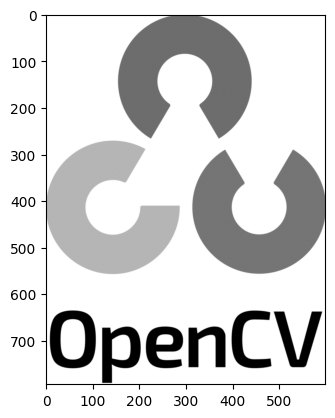

In [30]:
plt.imshow(img,'gray')

Récuperez quelques infos utiles de notre image.

In [31]:
rows,cols = img.shape
img_dtype = img.dtype

---
**2.**

Chaque élement de la matrice correspond donc à un pixel de l'image. Dans le cas de notre matrice *img* en niveaux de gris, chaque pixel à la position *(i,j)* contient donc une seule valeur **_I_** *(i,j)*, qui est le niveau de gris au point *(i,j)* (*i* : numéro de ligne, *j* : numéro de colonne). 

Récupérez le niveau de gris du pixel *(50,100)*.

In [32]:
img[50,100]

np.uint8(255)

Récupérez le quart bas gauche de l'image et affichez le résultat (image).

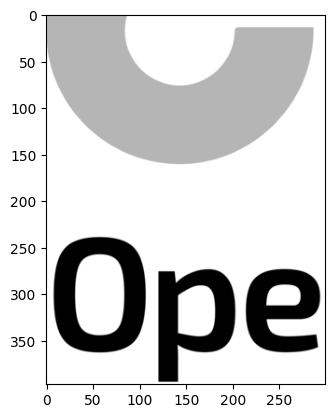

In [33]:
# A COMPLETER
# Récupérez le quart bas gauche d'img
sub_img = img[rows//2:, 0:cols//2]
# Affichez le résultat
plt.imshow(sub_img,'gray')

---
**3.**

Transposez la variable *img* avec la fonction *transpose* de NumPy, et affichez le résultat en niveaux de gris.

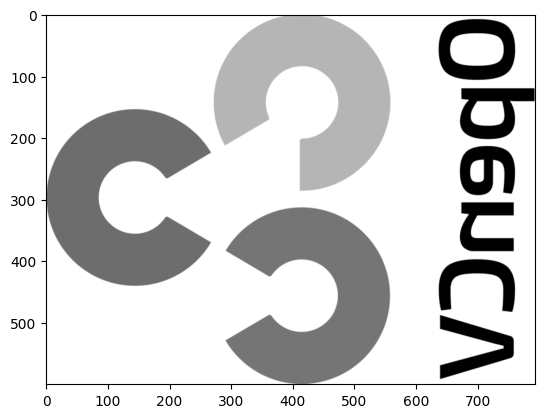

In [34]:
# A COMPLETER
plt.imshow(np.transpose(img),'gray')

Réalisez une rotation de 90° à img avec la fonction *rot90* de NumPy et affichez le résultat obtenu en niveaux de gris.

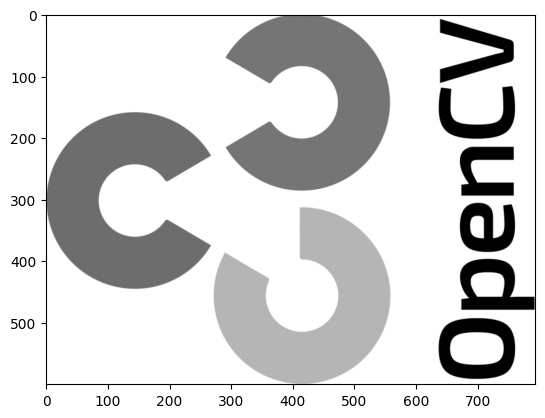

In [35]:
# A COMPLETER
# Rotation de l'image de 90° et affichage du résultat
plt.imshow(np.rot90(img,1),'gray')

Que remarquez-vous ?

**_REPONSE :_** La transposition de la matrice img donne la symétrie axiale de la même image, selon la diagonale NO-SE. On ne peut obtenir la transposée de l'image en ne faisant uniquement une rotation.

La fonction précédente *rot90* fait le job, mais uniquement pour des rotations à 90, 180 ou 270°. Si on veut effectuer une rotation à n'importe quel degré, il faut utiliser une autre fonction.

D'un point de vue plus global, pour effectuer sur une image une rotation, une translation, ou les 2, il faut de préférence passer par une matrice de transformation géométrique, qu'on appliquera sur l'image. La transformation géométrique sera abordée dans le cours de Stéréovision (Semestre 4.2).

Réalisez une rotation de 45° à *img* avec les fonctions d'OpenCV :
- *getRotationMatrix2D* pour obtenir la matrice de rotation de 45° pour l'image *img* ;
- *warpAffine* pour appliquer la rotation à *img* avec la matrice de rotation calculée.

Affichez le résultat obtenu en niveaux de gris.

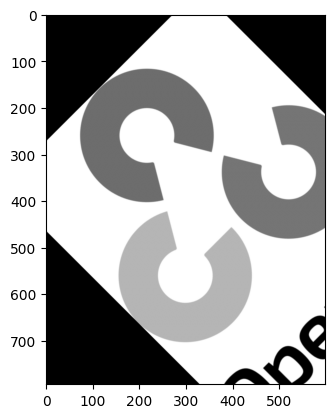

In [36]:
# A COMPLETER
# Calcul de la matrice de rotation
rot = cv2.getRotationMatrix2D((rows//2,cols//2),45,1)
# Rotation de l'image avec la matrice de rotation et affichage du résultat
plt.imshow(cv2.warpAffine(img,rot,(cols,rows)),'gray')

Que remarquez-vous ?

**_REPONSE :_** La rotation de l'image à un angle non multiple de 90° entraîne une perte d'information car les dimensions de l'image sortante sont plus grandes que celles entrantes. 

---
## Ex 3. Création et visualisation des images

**1.**

Créez une matrice *_M_* de taille *_N x N_* avec *N = 256* dont le terme général est **_M_** *(i,j) = j*, puis affichez la en niveaux de gris.



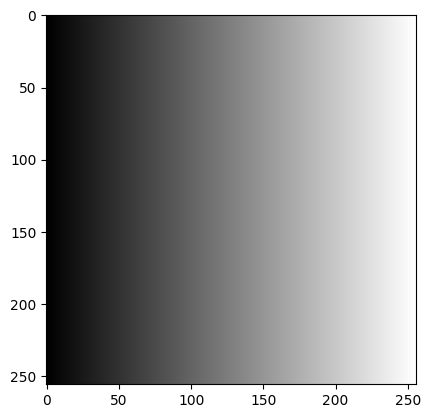

In [37]:
# A COMPLETER
# Création de la matrice M
M = np.tile(np.arange(0,256),(256,1))
# Affichage de la matrice M en niveaux de gris
plt.imshow(M,'gray')

---
**2.**

Pour l'instant, nous avons uniquement affiché nos images en niveaux de gris (*'gray'*), mais il est possible d'utiliser des palettes différentes. 

La liste des palettes disponibles sur Matplotlib est à ce lien : https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html.

Affichez la matrice M avec une palette de couleurs (autre que niveaux de gris).

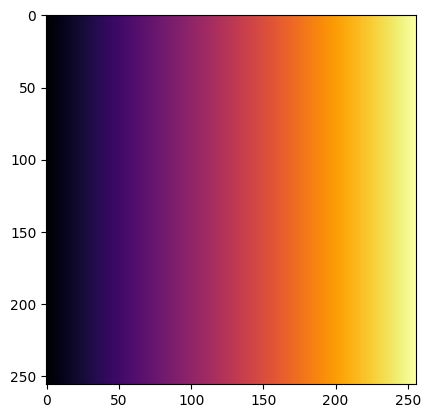

In [38]:
# A COMPLETER
# Affichage de la palette de couleurs
plt.imshow(M,'inferno')

Affichez maintenant l'image logo avec cette même palette de couleurs.

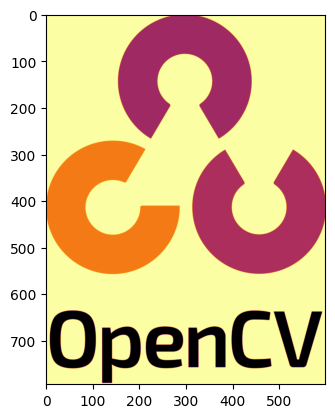

In [39]:
# A COMPLETER
# Affichage de l'image logo avec la palette de couleurs
plt.imshow(img,'inferno')

---
**3. (optionnel)**

Il est également possible de créer sa propre palette et de l'appliquer sur une image.

Pour cela, on va créer une instance *colormap* de la classe *ListedColormap*, qui contiendra la matrice *colors*. Cette matrice sera de taille *(N,4)*, où N est un naturel de votre choix. Les 3 premières colonnes (RGB) contiendront des réels entre 0 et 1, et la dernière colonne (A pour la transparence) sera un vecteur rempli de 1, de longueur *N*.

Créez la matrice *colors*.

In [40]:
# A COMPLETER
N = 25
colors = np.concatenate([np.random.rand(N,3),np.ones((N,1))],axis=1)
# Vérification de la taille de la matrice colors
assert colors.shape == (N,4), 'la taille de la matrice doit être (N, 4), N = '+str(N)+' , colors.shape = '+str(colors.shape)

In [41]:
# Création de la colormap
from matplotlib.colors import ListedColormap
colormap = ListedColormap(colors)

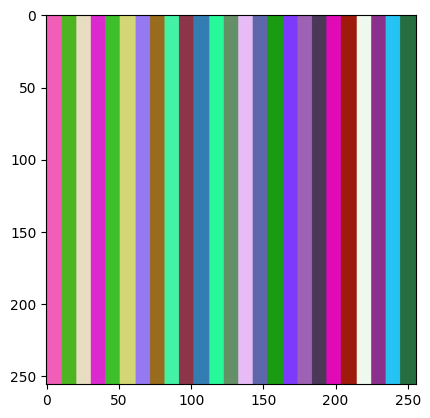

In [42]:
# A COMPLETER
# Affichage de la matrice M avec la palette créée
plt.imshow(M,colormap)

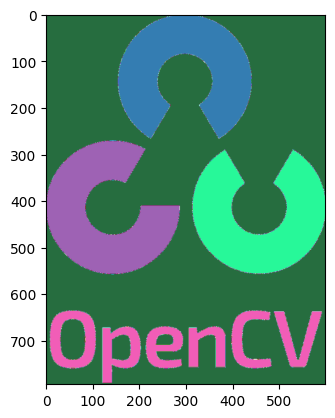

In [43]:
# A COMPLETER
# Affichage du logo avec la palette créée
plt.imshow(img,colormap)

--- 
## Ex. 4 : Calculs sur les images ###

Pour cette partie, passons à la couleur en étudiant l'image logo_color.png.

**1.**

Commencez d'abord par la charger et stockez la dans la variable img_color. 

In [44]:
# A COMPLETER
# Chargement de l'image logo_color.png
img_color = cv2.imread(path_images+"logo_color.png",-1)

Affichez le nombre de dimensions de l'image chargée.

In [45]:
# A COMPLETER
# Affichage du nombre de dimensions de l'image chargée
print(img_color.ndim)

3


---
**2.**

Affichez les dimensions de l'image.

In [46]:
# A COMPLETER
# Affichage des dimensions de l'image
print(img_color.shape)

(794, 600, 3)


Vous pouvez voir que l'image couleur chargée possède 3 channels : un channel bleu, un channel vert et un channel rouge. Le format de l'image est BGR (Blue, Green, Red).

Affichez l'image img_color en couleur.

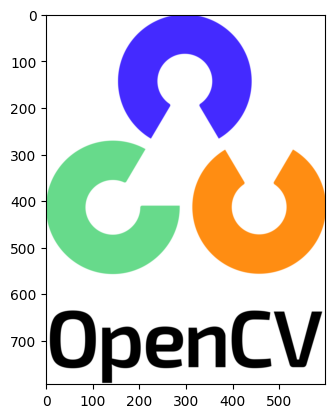

In [47]:
# A COMPLETER
# Affichage de img_color en couleur
plt.imshow(img_color)

L'image est bizarre ? Vous remarquez un soucis particulier ? Au niveau des couleurs ? C'est normal : OpenCV a la particularité de charger les images couleurs en format BGR et non RGB.

Pour des raisons pratiques, convertissez l'image BGR en format RGB avec la fonction cv2.cvtColor avec cv2.COLOR_BGR2RB en paramètre :

        img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

In [48]:
# A COMPLETER
# Conversion de l'image de BGR en RGB
img_rgb = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)

Affichez l'image RGB.

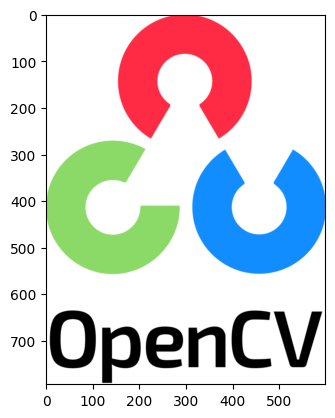

In [49]:
# A COMPLETER
# Affichage de img_color en couleur
plt.imshow(img_rgb)

Affichez maintenant les composantes rouge, verte et bleue de l'image (images des intensités de chaque channel en N&B).

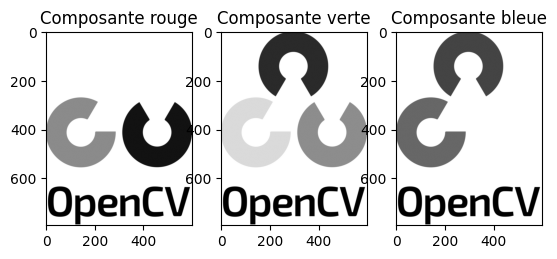

In [50]:
# A COMPLETER
# Affichage de chaque composante couleur (en N&B)
plt.subplot(1,3,1)
plt.imshow(img_rgb[:,:,0],'gray')
plt.title("Composante rouge")
plt.subplot(1,3,2)
plt.imshow(img_rgb[:,:,1],'gray')
plt.title("Composante verte")
plt.subplot(1,3,3)
plt.imshow(img_rgb[:,:,2],'gray')
plt.title("Composante bleue")
plt.show()

---
**3.**

Convertissez l'image couleur RGB en niveaux de gris :
- En utilisant la fonction cvtColor d'OpenCV
- En la calculant manuellement avec la formule *$I_{gray}$ = $\alpha$ R + $\beta$ G + $\gamma$ B* sachant que *$\alpha$ = 0.2989*, *$\beta$ = 0.5870* et *$\gamma$ = 0.1140* 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

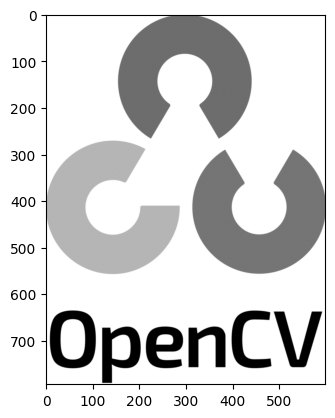

In [51]:
# A COMPLETER
# Conversion en niveaux de gris avec cvtColor
img_gray_1 = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
# Affichage de l'image en niveaux de gris
plt.imshow(img_gray_1,'gray')
img_gray_1

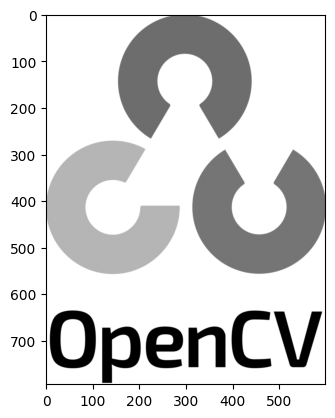

In [52]:
# A COMPLETER
alpha = 0.2989
beta = 0.5870
gamma = 0.1140

# Conversion manuelle en niveaux de gris
img_gray_2 = img_rgb[:,:,0]*alpha + img_rgb[:,:,1]*beta + img_rgb[:,:,2]*gamma
# Affichage de l'image en niveaux de gris
plt.imshow(img_gray_2,'gray')

Comparez les résultats :
- Au niveau des matrices elles-mêmes ;
- Au niveau visuel

**_REPONSE :_** D'un point de vue matriciel, la conversion d'OpenCV sort une matrice uint8, tandis que la conversion manuelle sort une matrice float64. Au niveau des valeurs, elles sont quasiment semblables. D'un point de vue visuel, la conversion manuelle donne l'impression que l'image est un peu plus claire.

---
## Ex. 5 : Quantification

**1.**

Pour cette partie, nous allons réutiliser l'image cameraman.tif. Chargez cette dernière.

In [53]:
# A COMPLETER
# Chargement de l'image cameraman en niveau de gris
cameraman_gray = cv2.imread(path_images+'cameraman.tif',-1)

Dans l'objectif de pouvoir compresser l'image, nous allons réduire le nombre de niveaux de gris grâce à une quantification.

Ici, vous ferez une quantification scalaire uniforme : à partir d'une image contenant K niveaux de gris, vous réduirez ce nombre à N niveaux de gris.

Dans notre cas, la quantification est scalaire (donc notre dictionnaire sera composé de scalaires, à savoir les niveaux de gris retenus), et uniforme. Cela veut dire que le pas de quantification (intervalle entre 2 niveaux de gris retenu) est constant. Il faudra donc calculer le pas de quantification en fonction de votre image et de N (nombre de niveaux de gris voulus).

In [54]:
# A COMPLETER
# Fonction imquantize
def imquantize(img,N):
    # Calcul du pas de quantification
    M = img.max()
    m = img.min()
    pas = (M-m)/(N-1)
    # Calcul des seuils en fonction du pas de quantification
    seuils = [np.floor(m+pas*n).astype(np.uint8) for n in range(N)]
    # Initialisation de l'image quantifiée (matrice remplie de la valeur minimum de img)
    imgQuantif = np.full(img.shape,m)
    for seuil in seuils:
        # Remplissage de l'image quantifiée par une nouvelle valeur seuil si les conditions sont requises (masque)
        imgQuantif[img.astype(np.int16)-seuil>0]=seuil
    return imgQuantif.astype(np.uint8)

On désire déterminer l'influence d'une quantification à pas variables.

Appliquez la quantification de l'image *cameraman* pour ne garder 128, 64, 32, 16, 8, 4 et 2 niveaux de gris.

In [55]:
# A COMPLETER
# Pas de quantification stockés dans une liste
nbr_gris = [128,64,32,16,8,4,2]
# Construction de la liste des images quantifiées correspondantes à chaque pas de quantification 
cameraman_quants = [imquantize(cameraman_gray,n) for n in nbr_gris]

Affichez les images quantifiées correspondantes à chaque pas de quantification afin de déterminer le seuil minimal de quantification à partir duquel certains faux contours apparaissent.

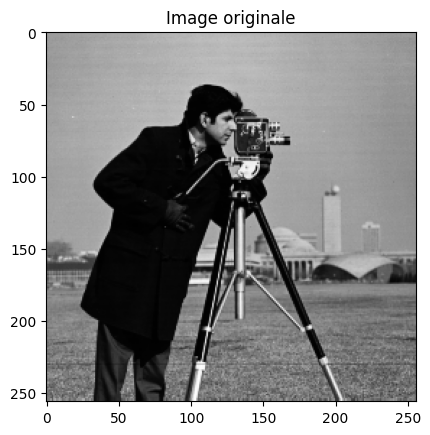

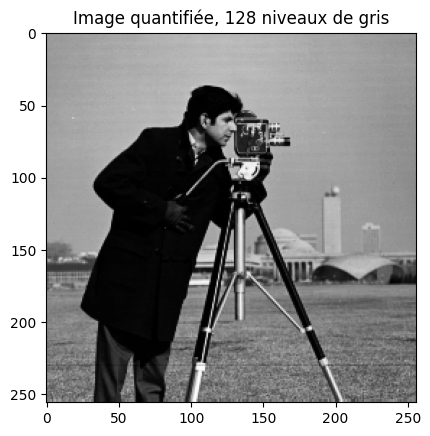

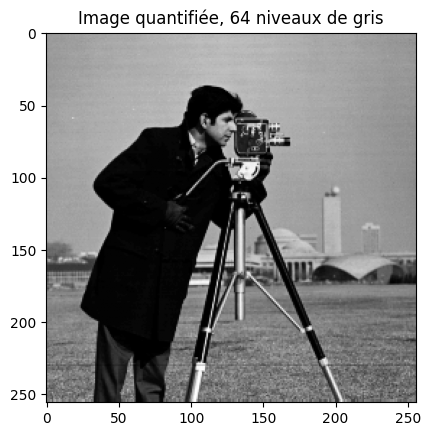

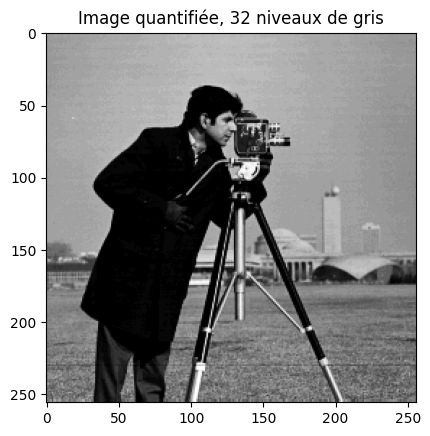

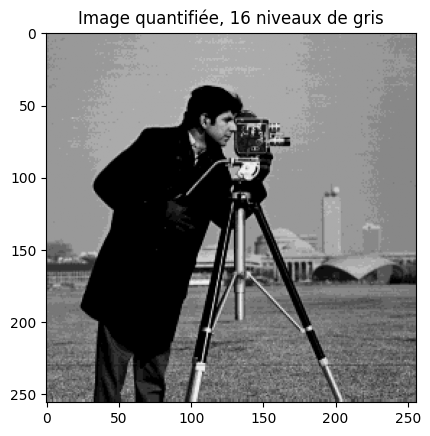

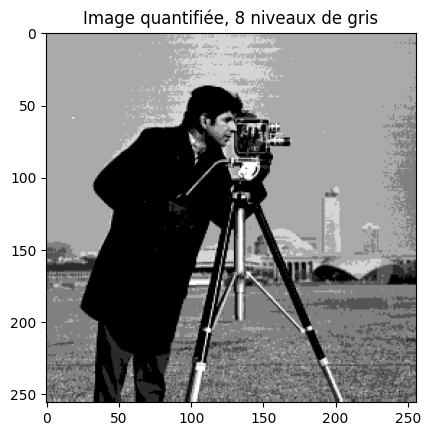

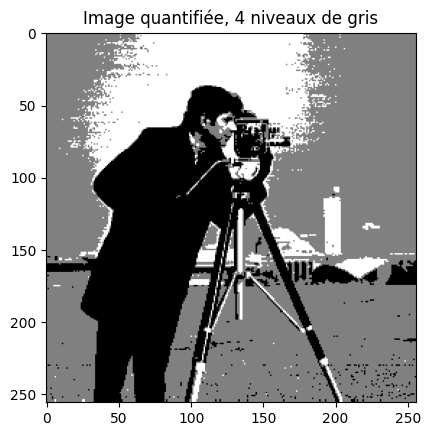

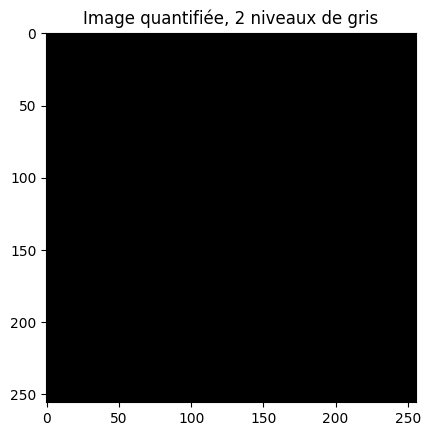

In [56]:
# A COMPLETER
# Affichage de l'image originale et des images quantifiées
plt.imshow(cameraman_gray,'gray')
plt.title('Image originale')
plt.show()
for i in range(len(nbr_gris)):
    plt.imshow(cameraman_quants[i],'gray')
    plt.title('Image quantifiée, '+str(nbr_gris[i])+' niveaux de gris')
    plt.show()

On va maintenant créer un histogramme d'une image. C'est un graphique qui affiche la distribution des valeurs de l'image. C'est un outil très utilisé dans ce domaine, donc la base, c'est de bien construire un histogramme. Un histogramme bien construit, c'est un histogramme avec :
- En abscisse : les valeurs possibles que peuvent prendre un pixel de l'image (même si elles ne sont pas présentes réellement dans l'image)
- En ordonnée : le nombre de pixels de l'image égaux à la valeur d'abscisse. La somme de toutes les valeurs en ordonnées nous donne le nombre de pixels de l'image.

Implémentez une fonction qui, à partir d'une image, affiche son histogramme en niveaux de gris.

In [57]:
# A COMPLETER
# Fonction de création d'histogrammes des niveaux de gris d'une image
def hist(img):
    # Récupération des niveaux de gris de l'image et leur présence dans l'image
    val,counts = np.unique(img,return_counts=True)
    # Ici, 256 correspond aux nombres de valeurs possibles 
    # de chaque pixel (car le type est uint8 donc entre 0 et 255)
    x = np.arange(256)
    y = np.zeros((256))
    for i,v in zip(range(len(val)),val):
        y[int(v)] = counts[i]
    # Affichage de l'image
    plt.figure()
    plt.bar(x,y)

Affichez l'histogramme de l'image originale et des images quantifiées grâce à la fonction hist de Matplotlib.

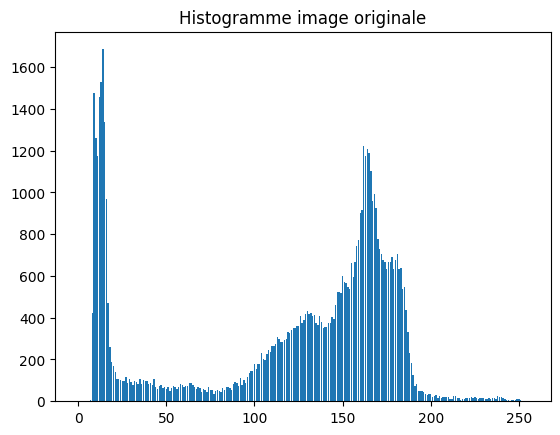

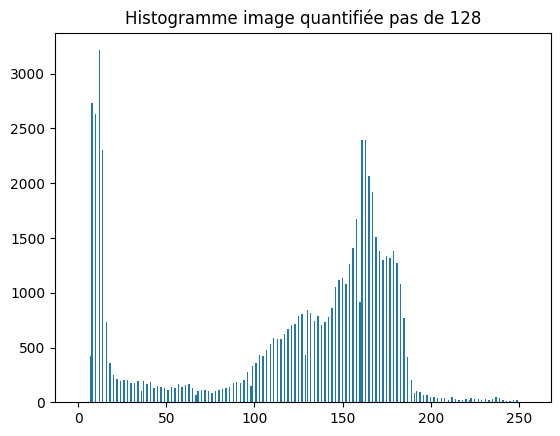

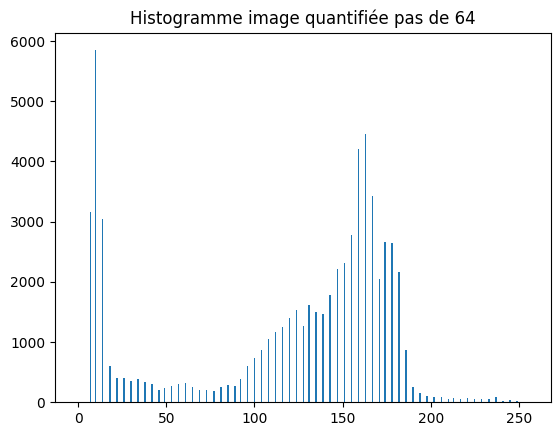

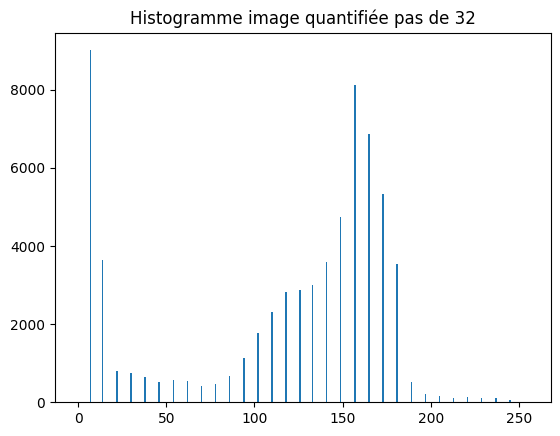

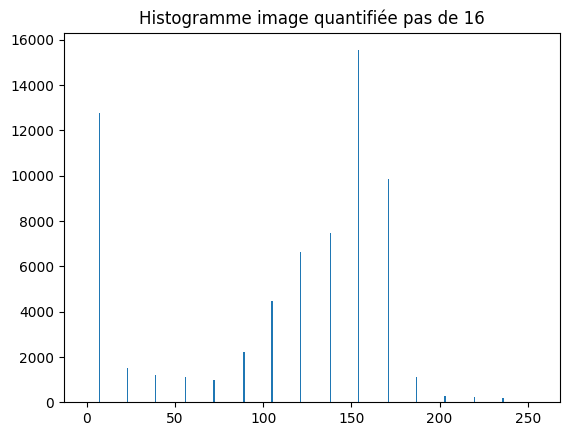

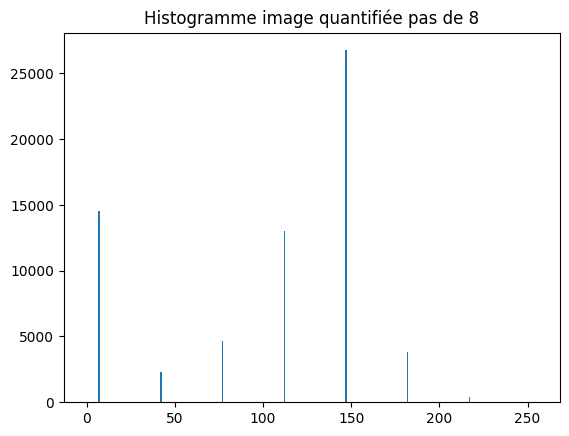

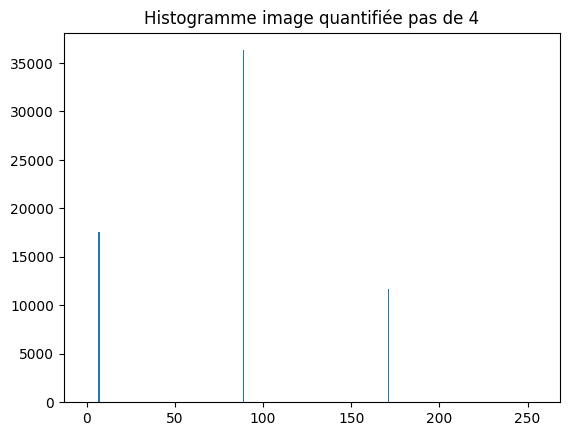

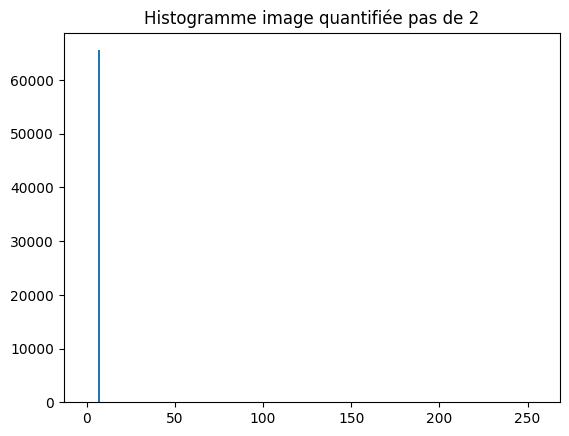

In [58]:
# A COMPLETER
# Affichage des histogrammes de l'image originale et des images quantifiées
hist(cameraman_gray)
plt.title('Histogramme image originale')
for i in range(len(nbr_gris)):
    hist(cameraman_quants[i])
    plt.title('Histogramme image quantifiée pas de '+str(nbr_gris[i]))

---
**2.**

Passons maintenant à l'image couleur *cameleon.tif*

Commencez par charger l'image en niveaux de gris et affichez-la.

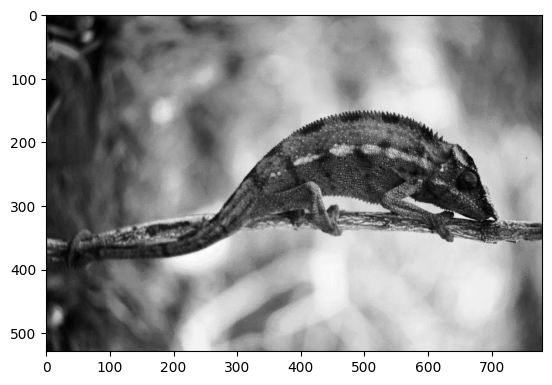

In [59]:
# A COMPLETER
# Chargement de l'image cameleon en niveaux de gris
cameleon = cv2.imread(path_images+'cameleon.tif',0)
# Affichage de l'image
plt.imshow(cameleon,'gray')

Appliquez la quantification de l'image *cameleon* pour ne garder que 128, 64, 32, 16, 8, 4 et 2 niveaux de gris.

In [60]:
# A COMPLETER
# Pas de quantification stockés dans une liste
nbr_gris = [128,64,32,16,8,4,2]
# Construction de la liste des images quantifiées correspondantes à chaque pas de quantification 
cameleon_quants = [imquantize(cameleon,n) for n in nbr_gris]

Affichez les images quantifiées correspondantes à chaque pas de quantification afin de déterminer le seuil minimal de quantification à partir duquel certains faux contours apparaissent.

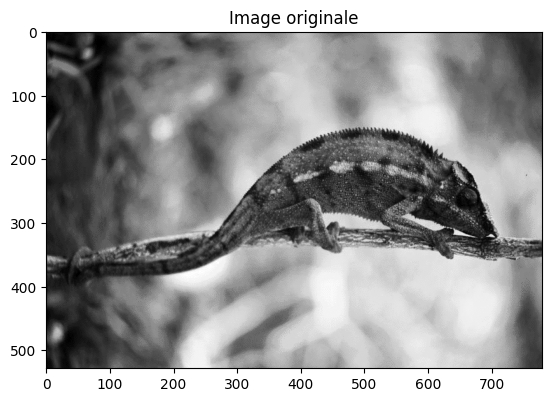

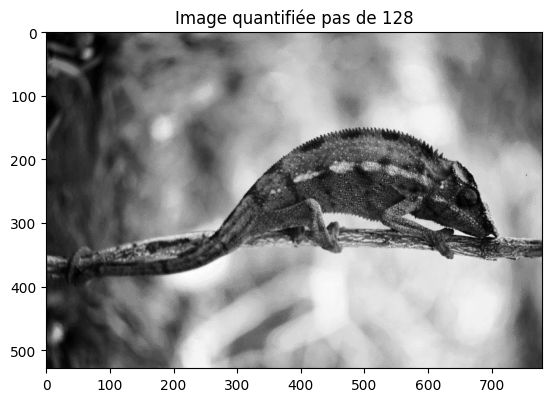

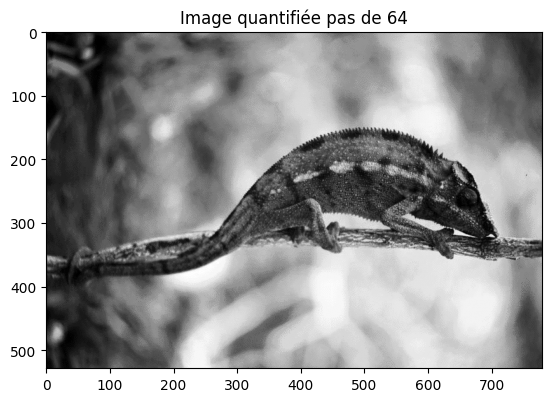

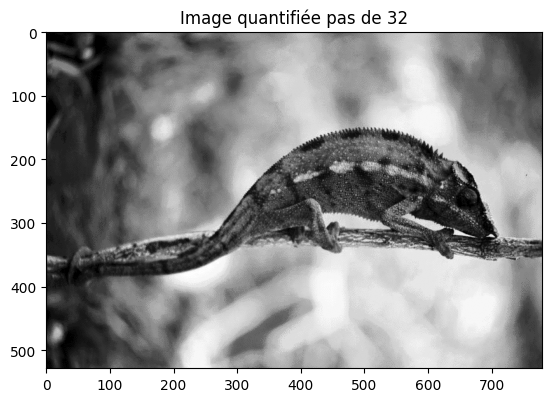

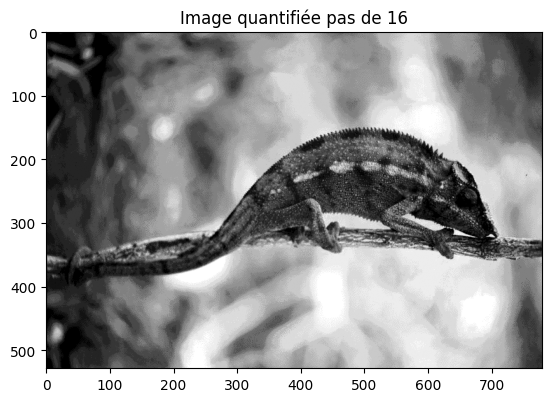

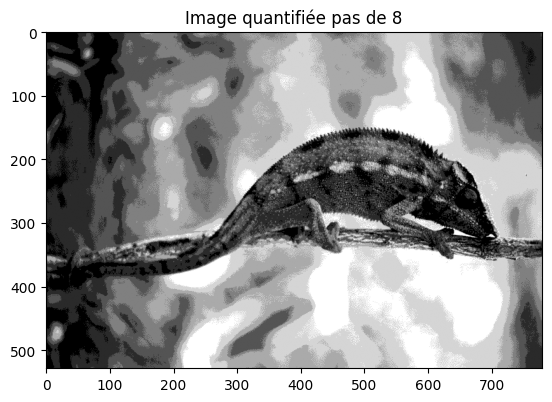

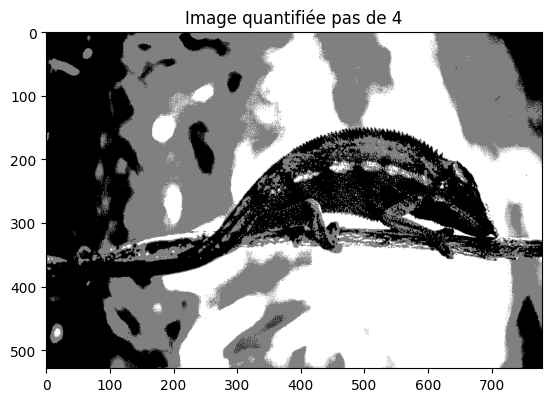

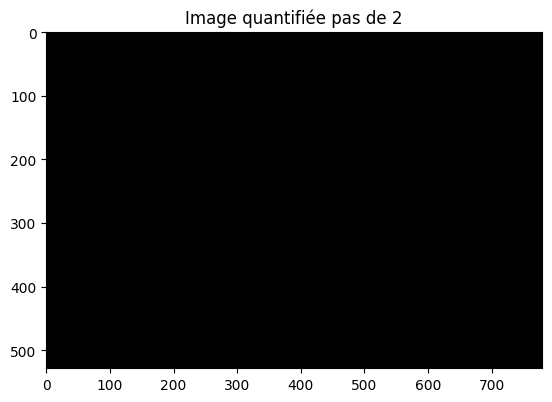

In [61]:
# A COMPLETER
# Affichage de l'image originale et des images quantifiées
plt.imshow(cameleon,'gray')
plt.title('Image originale')
plt.show()
for i in range(len(nbr_gris)):
    plt.imshow(cameleon_quants[i],'gray')
    plt.title('Image quantifiée pas de '+str(nbr_gris[i]))
    plt.show()

Affichez l'histogramme de l'image originale et des images quantifiées grâce à la fonction hist de Matplotlib.

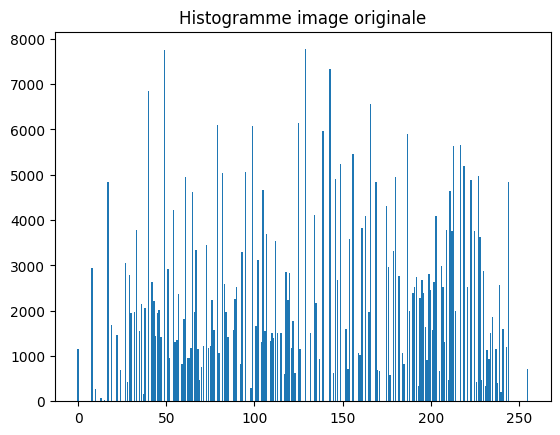

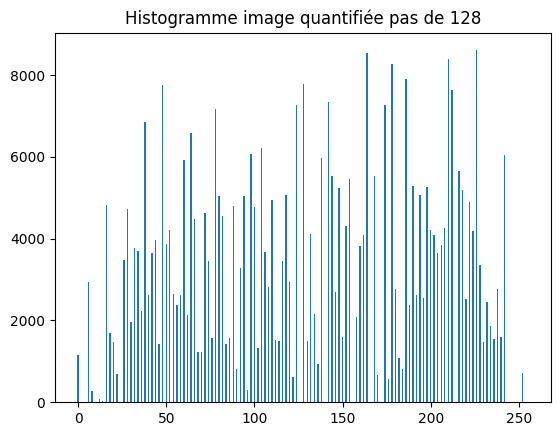

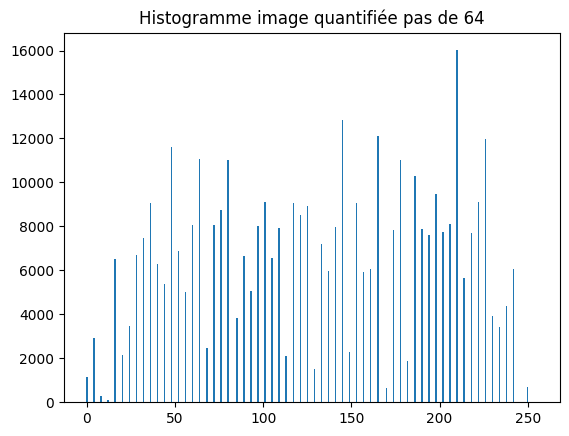

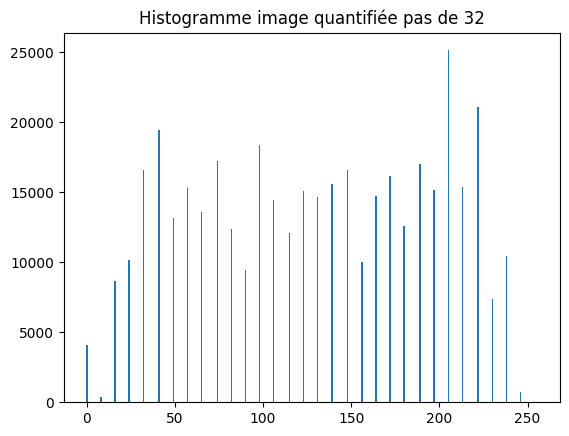

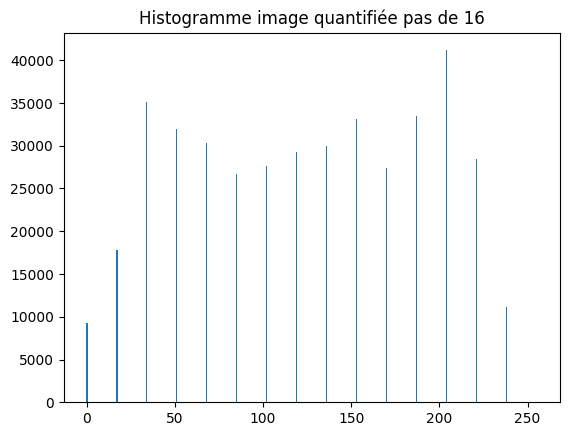

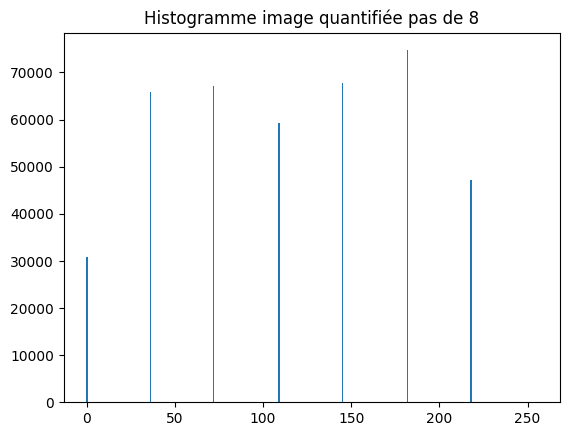

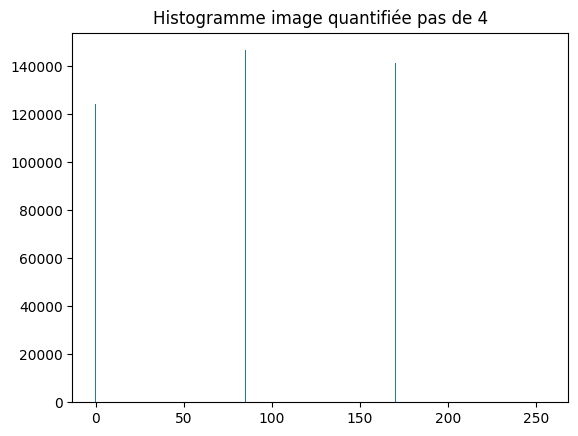

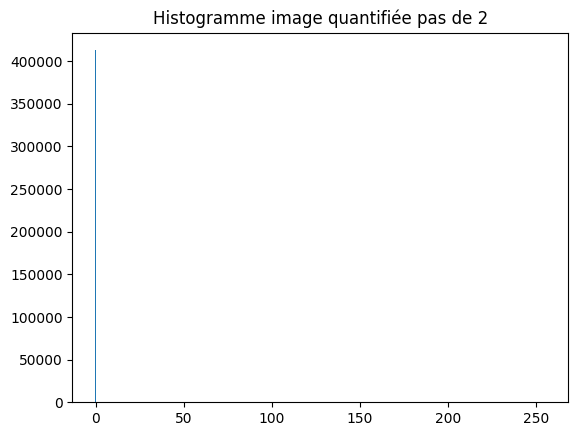

In [62]:
# A COMPLETER
# Affichage des histogrammes de l'image originale et des images quantifiées
hist(cameleon)
plt.title('Histogramme image originale')
for i in range(len(nbr_gris)):
    hist(cameleon_quants[i])
    plt.title('Histogramme image quantifiée pas de '+str(nbr_gris[i]))

Comparez les résultats obtenus avec les 2 images et conclure.

**_REPONSE :_** On peut voir pour l'image cameleon que la quantification dégrade très vite la qualité de l'image (N <= 16). Pour cameraman, on note une dégradation importante également à N <=16 en ce qui concerne le ciel, mais pas tant sur le premier plan de l'image. 

La quantification de l'image dépend donc de l'image que nous traitons. Pour une quantization plus efficace tout en limitant la perte d'information, il faudrait utiliser autre chose qu'un pas constant. Pour cela, on peut se tourner sur les algos de compressions d'images qui traîtent ce problème.

---
**3.**

La quantification peut se faire également pour les images en couleur. Pour cela, nous allons charger l'image *cameleon* en couleur cette fois.

In [63]:
# A COMPLETER
# Chargement de l'image cameleon
cameleon_color = cv2.cvtColor(cv2.imread(path_images+'cameleon.tif',-1),cv2.COLOR_BGR2RGB)

Comme vous le savez déjà, une image couleur possède 3 canaux presque-indépendants les uns des autres. On peut quantifier l'image en utilisant la même fonction développée précédemment sur chacun des canaux. Faites un essai de cette méthode sur chacun des canaux de *cameleon*, de la même manière que précedemment, en ne gardant que 4 niveaux de gris et affichez le résultat.

uint8


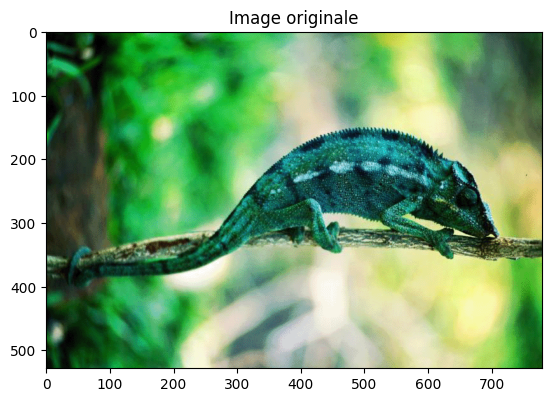

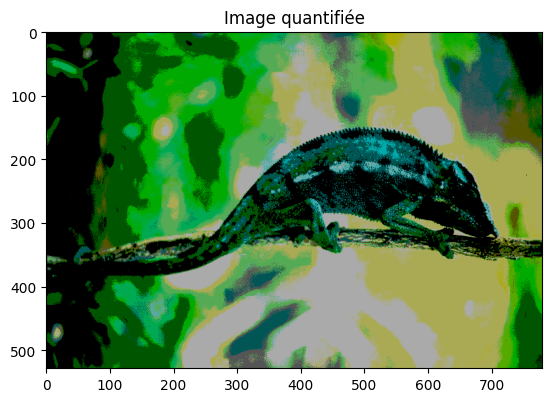

In [64]:
# A COMPLETER
# Quantification de chacun des channels pour ne garder que 4 niveaux de gris
quant_cameleon_color = np.stack([imquantize(cameleon_color[:,:,i],4) for i in range(3)],axis=2)
print(quant_cameleon_color.dtype)

# Affichage de l'image quantifiée
plt.imshow(cameleon_color)
plt.title('Image originale')
plt.show()
plt.imshow(quant_cameleon_color)
plt.title('Image quantifiée')
plt.show()

Que remarquez-vous ?

**_REPONSE :_** Nous avons plus que 4 couleurs ici. La quantification sur chaque channel permet de garder 4 niveaux de gris pour chaque channel, donc un total max de 64 couleurs possibles.

Pour effectuer une quantification couleur, il nous faut un autre algorithme, pour définir les N couleurs les plus représentatives de notre image.

Comme on est gentil :D , on vous passe la fonction imquantize (équivalent de la fonction Matlab).
imquantize prend en entrée :
- img : l'image à quantifier ;
- n_colors : le nombre de couleurs maximum pour la quantification.

imquantize retourne en sortie quant, l'image img quantifiée.

Ici la quantification se fait en sélectionnant les *N* couleurs les plus représentatives de notre image.

In [65]:
def imcolorquantize(img,n_colors):
    if img.ndim == 2:
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    (h, w) = img.shape[:2]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    img = img.reshape((img.shape[0] * img.shape[1], 3))
    
    # apply k-means using the specified number of clusters and
    # then create the quantized image based on the predictions
    clt = MiniBatchKMeans(n_colors)
    labels = clt.fit_predict(img)
    quant = clt.cluster_centers_.astype("uint8")[labels]
     
    # reshape the feature vectors to images
    quant = quant.reshape((h, w, 3))
 
    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)

    return quant

La fonction implémentée, appliquez une quantification à l'image *cameleon* pour ne retenir que 4 couleurs et affichez-la.

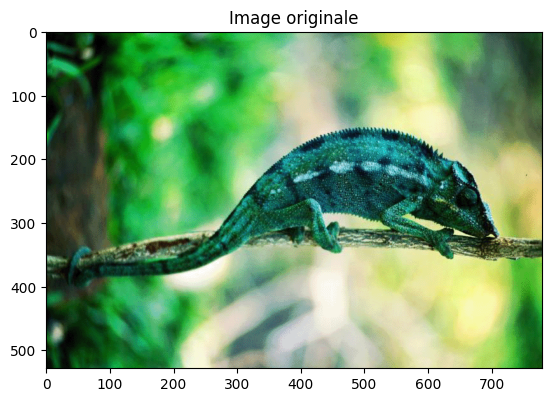

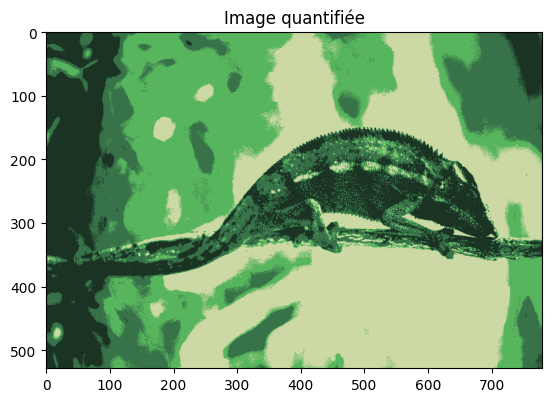

In [66]:
# A COMPLETER
# Application de la quantification
quant_lena_color = imcolorquantize(cameleon_color,4)
# Affichage de l'image originale et de l'images quantifiée
plt.imshow(cameleon_color)
plt.title('Image originale')
plt.show()
plt.imshow(quant_lena_color)
plt.title('Image quantifiée')
plt.show()

## Ex 6. : Re-échantillonnage

**1.**

Chargez l'image *mire.png* en niveaux de gris et affichez-la.

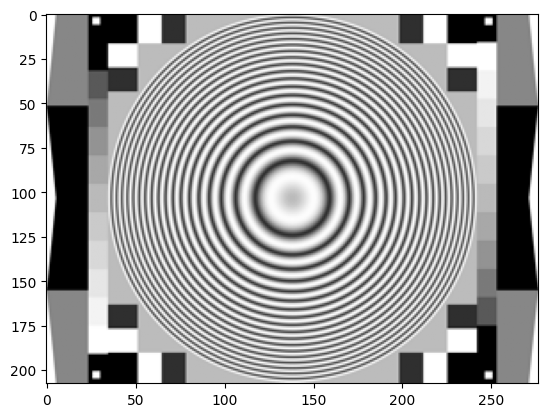

In [67]:
# A COMPLETER
# Chargerment de l'image
mire = cv2.imread(path_images+'mire.png',0)
# Affichage de l'image
plt.imshow(mire,'gray')

Créez une version sous-échantillonnée par un facteur 2 de cette image à l'aide d'une fonction que vous écrirez. Pour cela, créez une nouvelle image en ne prenant qu'un pixel sur deux dans l'image originale. (Opération à réaliser sur les lignes et les colonnes de l'image de départ).

In [68]:
# A COMPLETER
# Fonction de sous-échantillonage
def subsampling(img,factor):
    (height,width) = img.shape
    new_img = np.empty((height//factor+1,width//factor+1),dtype = img.dtype)
    for h in range(height):
        for w in range(width):
            if (h%factor==0) and (w%factor==0):
                new_img[h//factor,w//factor] = img[h,w]
    return new_img

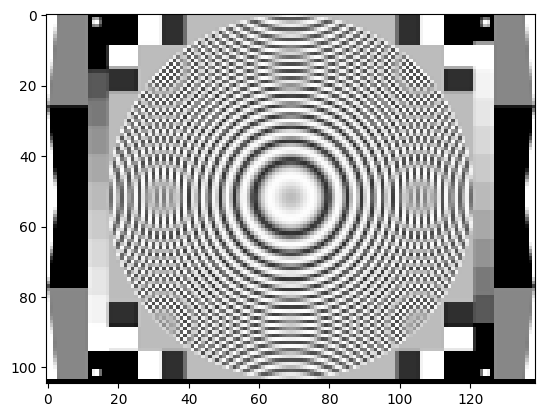

In [69]:
# A COMPLETER
# Affichage de l'image sous échantillonnée avec un facteur 2
subsampled_img = subsampling(mire,2)
plt.imshow(subsampled_img,'gray')

---
**2.**

Créez la même fonction sans boucle grâce à l'indexation des tableaux NumPy.

In [70]:
# A COMPLETER
# Fonction de sous échantillonage sans boucle
def subsampling2(img,factor):
    return img[::factor,::factor]

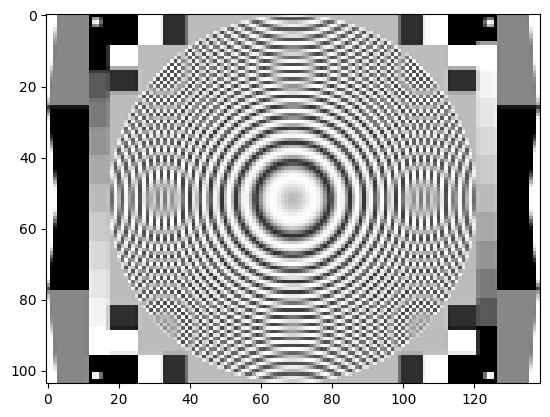

In [71]:
# A COMPLETER
# Affichage de l'image sous échantillonnée avec un facteur 2
subsampled_img_2 = subsampling2(mire,2)
plt.imshow(subsampled_img_2,'gray')

Décrivez les effets du sous-échantillonnage.

**_REPONSE :_** Le sous-échantillonnage d'un facteur 2 fait apparaître quelques nouvelles formes dans l'image mire.

---
**3.**

Refaites le sous-échantillonnage de la même image mais avec un facteur 4 (avec les 2 fonctions que vous avez implémenté).

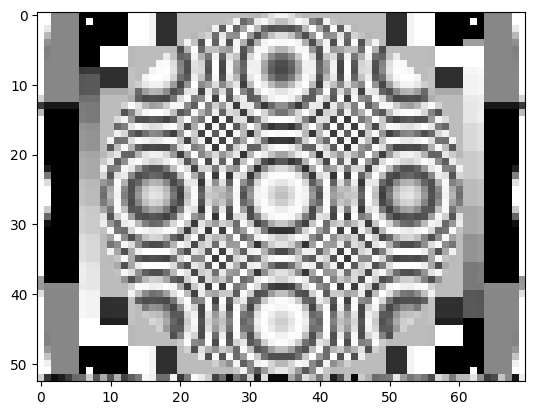

In [72]:
# A COMPLETER
# Affichage de l'image sous échantillonnée avec un facteur 4 (fonction avec boucle)
subsampled_img = subsampling(mire,4)
plt.imshow(subsampled_img,'gray')

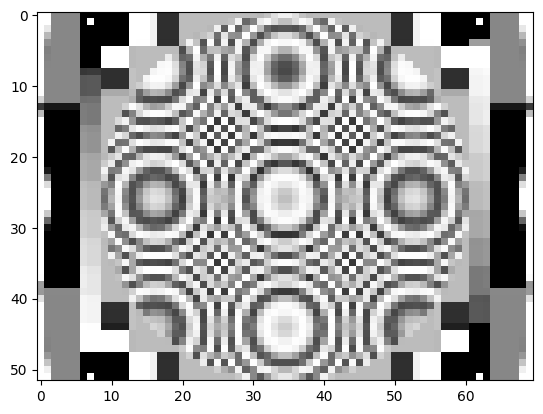

In [73]:
# A COMPLETER
# Affichage de l'image sous échantillonnée avec un facteur 4 (fonction sans boucle)
subsampled_img_2 = subsampling2(mire,4)
plt.imshow(subsampled_img_2,'gray')

Décrivez les effets du sous-échantillonnage.

**_REPONSE :_** Le sous-échantillonnage d'un facteur 4 sur l'image mire rend l'image totalement différente de l'originale, avec beaucoup de formes différentes.

## Rendu de TP
Le rendu qui vous est demandé pour les TP de TIM est la version HTML de ce notebook. Pour cela, avant de déposer votre rendu, vous devez :
- Redémarrer le noyau/kernel Python en effaçant les sorties
- Exécuter toutes les cellules du Notebook à la suite
- Exporter le fichier en HTML